In [31]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Step 1: Read the CSV
def read_custom_csv(path):
    df = pd.read_csv(path, header=None, sep='\t', names=['run_id', 'fitness', 'features'])
    df['features'] = df['features'].apply(ast.literal_eval)
    return df

# Step 2: Filter improvements and plot
def plot_feature_progress(df):
    for run_id in df['run_id'].unique():
        run_df = df[df['run_id'] == run_id].reset_index(drop=True)
        best_so_far = float('-inf')
        improved_rows = []

        for idx, row in run_df.iterrows():
            if row['fitness'] > best_so_far:
                best_so_far = row['fitness']
                improved_rows.append((idx, row['features']))

        if improved_rows:
            indices, features = zip(*improved_rows)
            features_df = pd.DataFrame(features, index=indices)
            features_df.columns = [f'Function group {i+1}' for i in range(features_df.shape[1])]

            plt.figure()
            for col in features_df.columns:
                plt.plot(features_df.index, features_df[col], marker='o', label=col)
            plt.title(f'Run {run_id} - AOCC per Group at Average AOCC Improvements')
            plt.xlabel('Evaluation Index')
            plt.ylabel('Feature Value')
            plt.legend()
            plt.grid(True)
            plt.show()


def plot_feature_progress2(df):
    run_ids = sorted(df['run_id'].unique())
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, run_id in enumerate(run_ids):
        if i > 3:
            continue
        ax = axes[i]
        run_df = df[df['run_id'] == run_id].reset_index(drop=True)
        best_so_far = float('-inf')
        improved_indices = []
        improved_features = []
        improved_fitness = []

        all_features = pd.DataFrame(run_df['features'].tolist())
        all_features.columns = [f'Group {i+1}' for i in all_features.columns]

        for idx, row in run_df.iterrows():
            if row['fitness'] > best_so_far:
                best_so_far = row['fitness']
                improved_indices.append(idx)
                improved_features.append(row['features'])
                improved_fitness.append(row['fitness'])

        # Plot all features (transparent)
        for col in all_features.columns:
            ax.plot(all_features.index, all_features[col], color='gray', alpha=0.2)

        # Plot improved feature values (normal)
        improved_df = pd.DataFrame(improved_features, index=improved_indices)
        improved_df.columns = all_features.columns
        for col in improved_df.columns:
            ax.plot(improved_df.index, improved_df[col], marker='o', label=col)

        # Plot fitness improvements as dashed black line
        ax.plot(improved_indices, improved_fitness, 'k--', label='Fitness (improvements)', linewidth=1)

        ax.set_title(f'Run {run_id+1}')
        ax.grid(True)

    #fig.suptitle('Feature Evolution and Fitness Improvements per Run', fontsize=14)
    fig.supxlabel('Evaluation Index')
    fig.supylabel('Value')

    # Handle legend outside of loop to avoid duplication
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [32]:
# Example usage
df1 = read_custom_csv('LLaMEA-1+1-GPT4-stn_data.csv')
df2 = read_custom_csv('LLaMEA-11-GPT4-stn_data.csv')


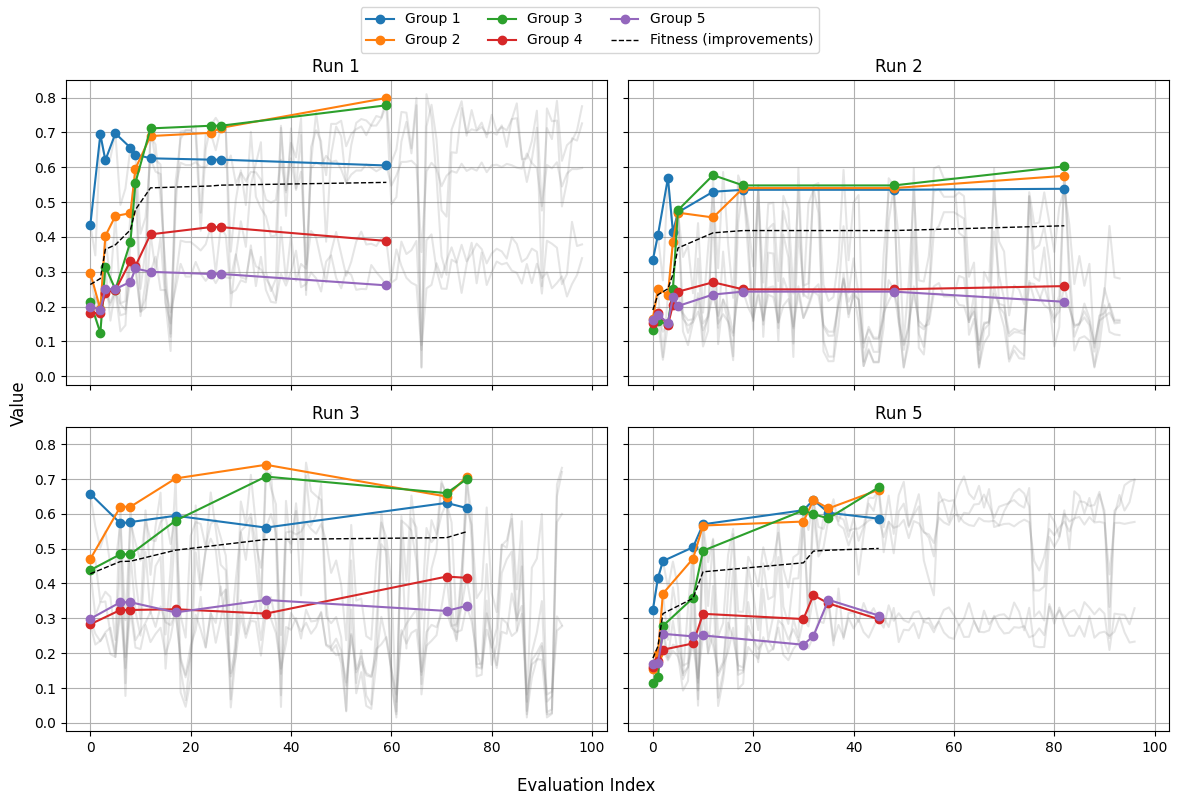

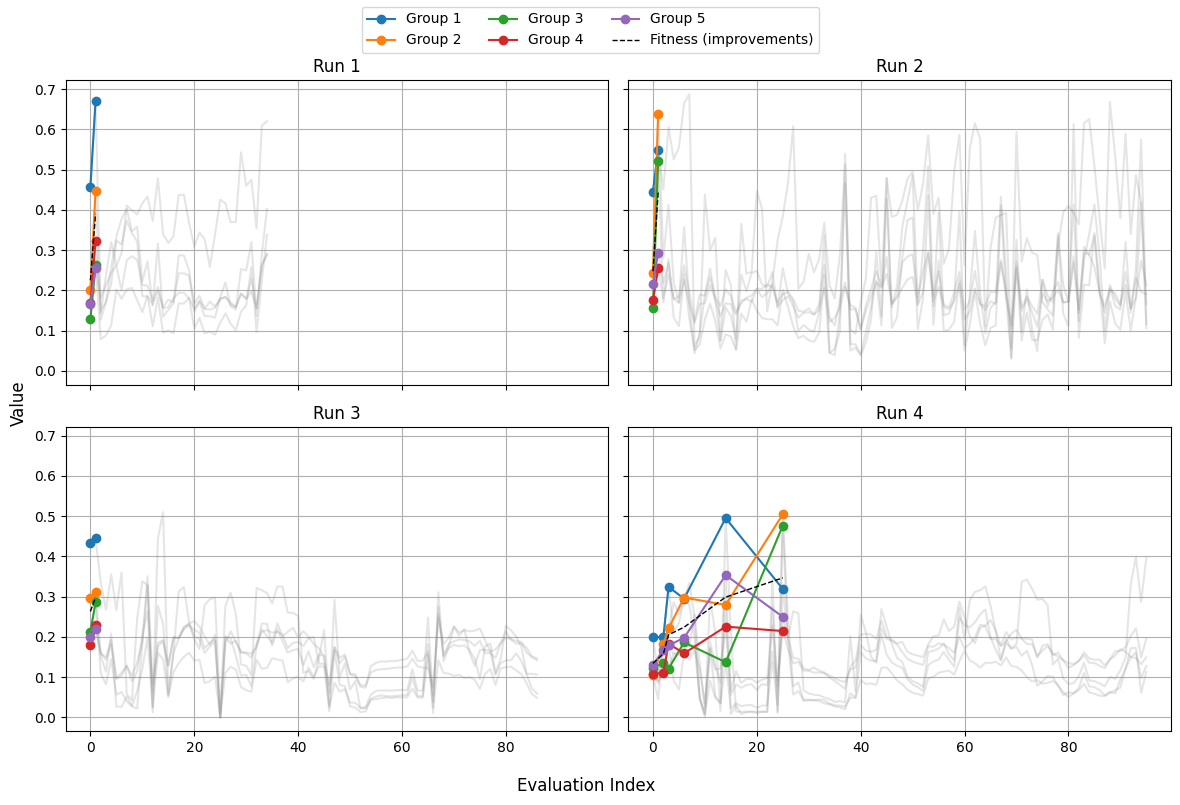

In [33]:
plot_feature_progress2(df1)
plot_feature_progress2(df2)